# 간단한 모델 생성

In [13]:
import tensorflow as tf

In [14]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


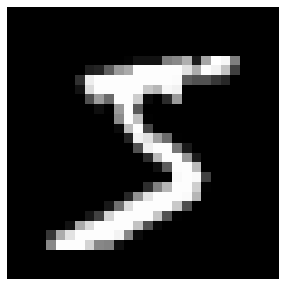

In [15]:
import matplotlib.pylab as plt

def plot_image(data,idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap="gray")
  plt.axis("off")
  plt.show()

plot_image(x_train, 0)

In [16]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [17]:
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [18]:
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [19]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv'),
        tf.keras.layers.MaxPool2D((2, 2), name='pool'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax'),
])

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2114 - accuracy: 0.9394 - val_loss: 0.0888 - val_accuracy: 0.9737
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0778 - accuracy: 0.9776 - val_loss: 0.0654 - val_accuracy: 0.9789
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0589 - accuracy: 0.9828 - val_loss: 0.0653 - val_accuracy: 0.9791
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0486 - accuracy: 0.9855 - val_loss: 0.0633 - val_accuracy: 0.9812
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0416 - accuracy: 0.9875 - val_loss: 0.0559 - val_accuracy: 0.9818
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0353 - accuracy: 0.9896 - val_loss: 0.0543 - val_accuracy: 0.9823
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0303 - accuracy: 0.9906 - val_loss: 0.0492 - val_ac

In [21]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 1s 4ms/step - loss: 0.0581 - accuracy: 0.9840


[0.05807718634605408, 0.984000027179718]

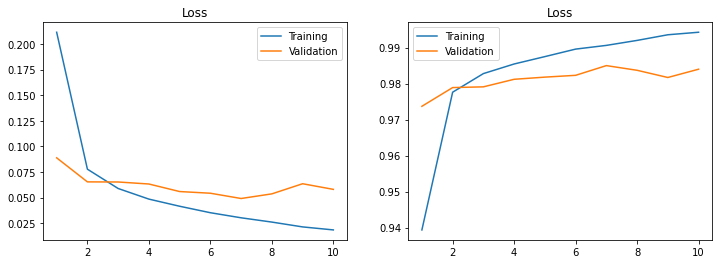

In [22]:
def plot_loss_acc(history, epoch):

  loss, val_loss = history.history['loss'], history.history['val_loss']
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

  fig,axes = plt.subplots(1, 2, figsize=(12, 4))

  axes[0].plot(range(1, epoch + 1), loss, label='Training')
  axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch + 1), acc, label='Training')
  axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Loss')

  plt.show()

plot_loss_acc(history, 10)

In [105]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten_11 (Flatten)        (None, 5408)              0         
                                                                 
 dense_8 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [106]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [107]:
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_8')>

In [108]:
model.layers 

In [109]:
model.layers[0]

In [110]:
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [111]:
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [112]:
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-5.64283490e-01,  1.32925406e-01, -8.83560538e-01,
            2.55335301e-01, -6.24033570e-01,  4.48076695e-01,
            2.25042775e-01, -4.86904591e-01,  8.44275892e-01,
           -1.95775673e-01,  2.67772586e-03,  3.15314718e-02,
            2.66695708e-01,  2.72739738e-01, -7.91404665e-01,
           -7.42955804e-01,  2.89523870e-01,  1.67448372e-01,
            2.48276219e-01,  3.82834613e-01, -4.17404085e-01,
            5.39822459e-01,  3.38272303e-01, -2.95125157e-01,
           -6.58574402e-01, -9.17141497e-01, -8.37787315e-02,
           -3.05194139e-01,  4.56966236e-02, -1.21769404e+00,
           -3.82902592e-01,  1.74918815e-01]],
 
         [[-2.65666485e-01,  3.12291116e-01, -7.21226335e-01,
            1.77874655e-01, -8.06374103e-02, -4.26997989e-01,
            1.17814936e-01,  5.03487280e-03,  1.71310171e-01,
            3.11517030e-01, -6.14610314e-02,  2.04640105e-01,
           

In [113]:
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-5.64283490e-01,  1.32925406e-01, -8.83560538e-01,
           2.55335301e-01, -6.24033570e-01,  4.48076695e-01,
           2.25042775e-01, -4.86904591e-01,  8.44275892e-01,
          -1.95775673e-01,  2.67772586e-03,  3.15314718e-02,
           2.66695708e-01,  2.72739738e-01, -7.91404665e-01,
          -7.42955804e-01,  2.89523870e-01,  1.67448372e-01,
           2.48276219e-01,  3.82834613e-01, -4.17404085e-01,
           5.39822459e-01,  3.38272303e-01, -2.95125157e-01,
          -6.58574402e-01, -9.17141497e-01, -8.37787315e-02,
          -3.05194139e-01,  4.56966236e-02, -1.21769404e+00,
          -3.82902592e-01,  1.74918815e-01]],

        [[-2.65666485e-01,  3.12291116e-01, -7.21226335e-01,
           1.77874655e-01, -8.06374103e-02, -4.26997989e-01,
           1.17814936e-01,  5.03487280e-03,  1.71310171e-01,
           3.11517030e-01, -6.14610314e-02,  2.04640105e-01,
           3.32447626e-02,  

In [114]:
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.07067643, -0.01855854, -0.00755068, -0.16613816, -0.19680977,
       -0.36787418, -0.28367168, -0.15545578,  0.07241584, -0.12278618,
       -0.24208112, -0.19688825, -0.2447575 , -0.27964827, -0.03694136,
       -0.03140554, -0.41355672, -0.15280879, -0.22090739, -0.15360726,
       -0.11819903, -0.00177466, -0.32189208, -0.24890704, -0.10756887,
       -0.22713056, -0.01039741, -0.25678992, -0.15930526,  0.19717509,
       -0.21929649, -0.12999602], dtype=float32)>

In [115]:
model.get_layer('conv')

In [116]:
activator = tf.keras.Model(inputs=model.input,
                           outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis, ...])
len(activations)

2

In [117]:
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

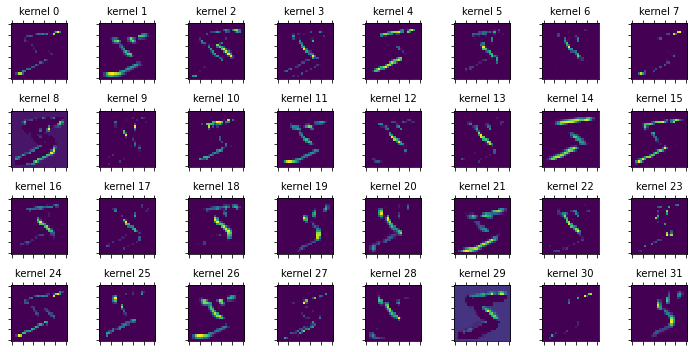

In [118]:
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [119]:
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


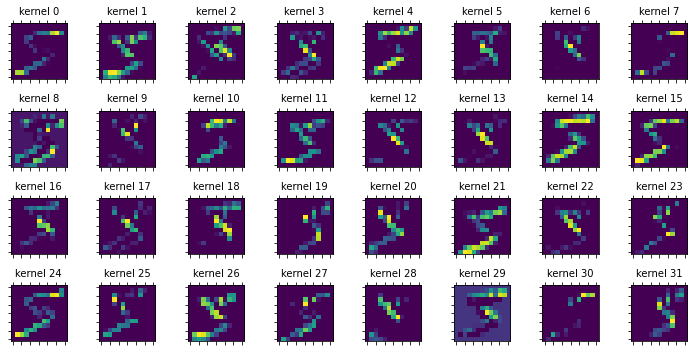

In [120]:
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

# 복잡한 모델 생성

In [121]:
import tensorflow as tf
import numpy as np

In [122]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [123]:
y_train_odd = []
for y in y_train:
    if y % 2==0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [124]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [125]:
y_valid_odd = []
for y in y_valid:
    if y % 2==0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [126]:
x_train = x_train / 255.0
x_valid = x_valid / 255.0

x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [127]:
inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 26, 26, 32)   320         ['input_5[0][0]']                
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 13, 13, 32)  0           ['conv2d_4[0][0]']               
                                                                                                  
 flatten_12 (Flatten)           (None, 5408)         0           ['max_pooling2d_4[0][0]']        
                                                                                            

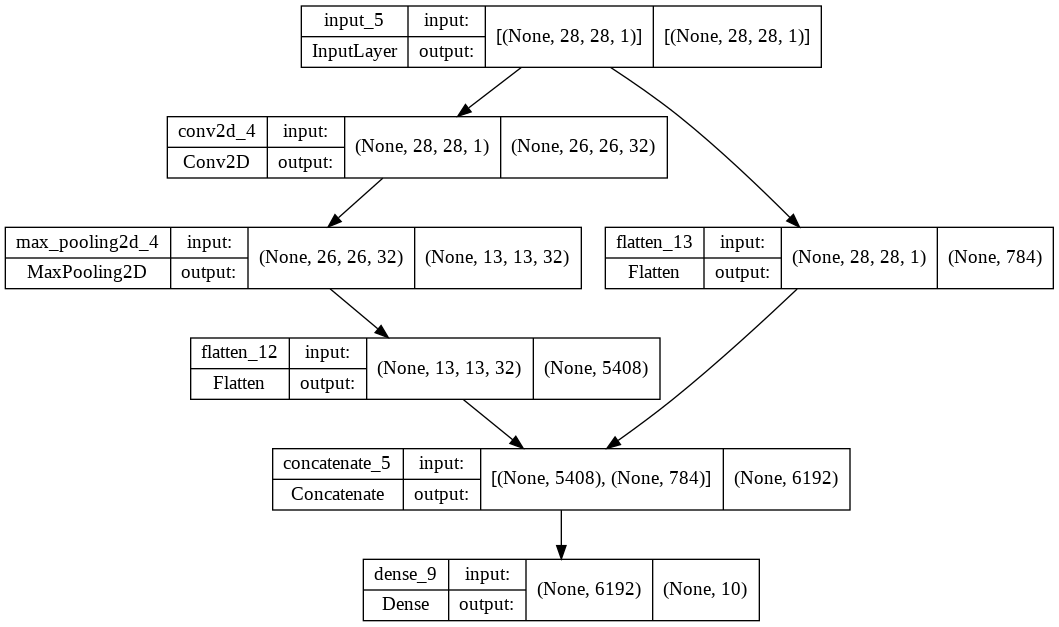

In [128]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [129]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2004 - accuracy: 0.9430 - val_loss: 0.0799 - val_accuracy: 0.9767
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0746 - accuracy: 0.9783 - val_loss: 0.0678 - val_accuracy: 0.9764
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0574 - accuracy: 0.9830 - val_loss: 0.0596 - val_accuracy: 0.9809
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0478 - accuracy: 0.9858 - val_loss: 0.0563 - val_accuracy: 0.9833
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0394 - accuracy: 0.9880 - val_loss: 0.0602 - val_accuracy: 0.9804
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0336 - accuracy: 0.9894 - val_loss: 0.0552 - val_accuracy: 0.9831
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0278 - accuracy: 0.9918 - val_loss: 0.0589 -

In [130]:
inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [131]:
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


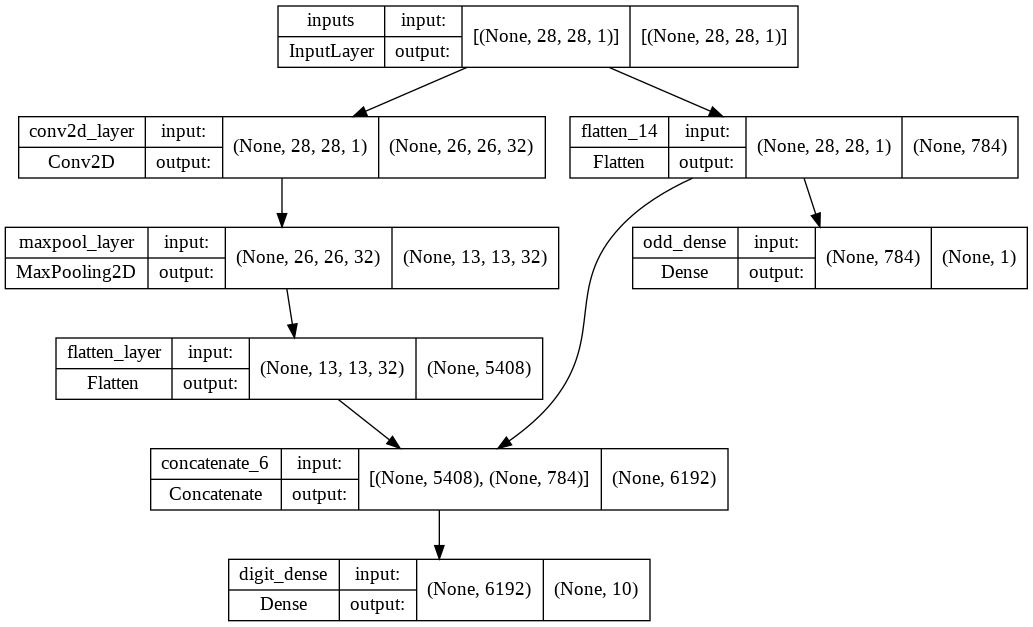

In [132]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [133]:
model.compile(optimizer='adam', loss={'digit_dense':'sparse_categorical_crossentropy',
                                      'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5},
              metrics=['accuracy'])

history = model.fit({'inputs':x_train_in}, {'digit_dense':y_train, 'odd_dense':y_train_odd},
                    validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid,
                    'odd_dense':y_valid_odd}), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3618 - digit_dense_loss: 0.1985 - odd_dense_loss: 0.3266 - digit_dense_accuracy: 0.9439 - odd_dense_accuracy: 0.8643 - val_loss: 0.2313 - val_digit_dense_loss: 0.0932 - val_odd_dense_loss: 0.2762 - val_digit_dense_accuracy: 0.9721 - val_odd_dense_accuracy: 0.8868
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2152 - digit_dense_loss: 0.0792 - odd_dense_loss: 0.2720 - digit_dense_accuracy: 0.9767 - odd_dense_accuracy: 0.8915 - val_loss: 0.2070 - val_digit_dense_loss: 0.0741 - val_odd_dense_loss: 0.2659 - val_digit_dense_accuracy: 0.9773 - val_odd_dense_accuracy: 0.8950
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1919 - digit_dense_loss: 0.0604 - odd_dense_loss: 0.2630 - digit_dense_accuracy: 0.9818 - odd_dense_accuracy: 0.8957 - val_loss: 0.1851 - val_digit_dense_loss: 0.0555 - val_odd_dense_loss: 0.2591 - val_digit_dense_accuracy: 0.9818 -

In [134]:
model.evaluate({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd})

313/313 [==============================] - 3s 9ms/step - loss: 0.1898 - digit_dense_loss: 0.0619 - odd_dense_loss: 0.2557 - digit_dense_accuracy: 0.9826 - odd_dense_accuracy: 0.9035


[0.18976402282714844,
 0.06193048879504204,
 0.2556670904159546,
 0.9825999736785889,
 0.9035000205039978]

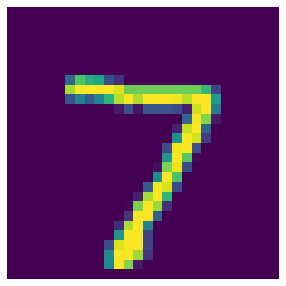

In [135]:
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5, 5))
  plt.imshow(data[idx])
  plt.axis("off")
  plt.show()

plot_image(x_valid, 0)

In [136]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

[1.7411363e-12 3.1129574e-09 2.4662572e-08 6.2834079e-05 4.3791915e-10
 6.1118233e-13 2.4405289e-20 9.9993670e-01 8.6990440e-08 4.3412712e-07]
[0.99955744]


In [137]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [138]:
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0: 10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

In [139]:
base_model_output = model.get_layer('flatten_layer').output 

base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


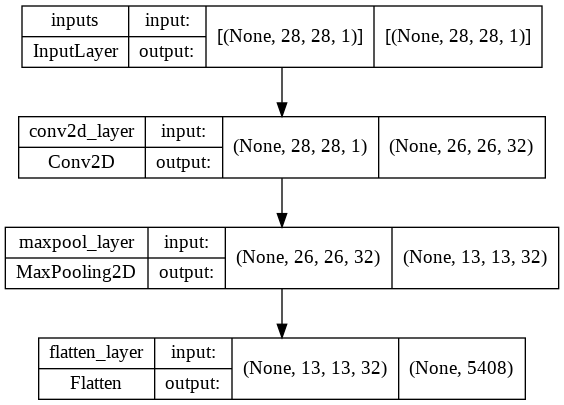

In [140]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [141]:
digit_model = tf.keras.Sequential([
                                   base_model,
                                   tf.keras.layers.Dense(10, activation='softmax')
                                 ])
digit_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_10 (Dense)            (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


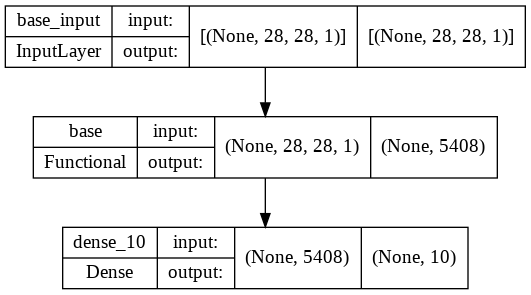

In [142]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [143]:
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = digit_model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1273 - accuracy: 0.9641 - val_loss: 0.0738 - val_accuracy: 0.9773
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0587 - accuracy: 0.9821 - val_loss: 0.0655 - val_accuracy: 0.9790
Epoch 3/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0446 - accuracy: 0.9867 - val_loss: 0.0527 - val_accuracy: 0.9824
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0361 - accuracy: 0.9887 - val_loss: 0.0551 - val_accuracy: 0.9837
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0293 - accuracy: 0.9910 - val_loss: 0.0502 - val_accuracy: 0.9850
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0247 - accuracy: 0.9919 - val_loss: 0.0587 - val_accuracy: 0.9819
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0206 - accuracy: 0.9933 - val_loss: 0.0555 -

In [144]:
base_model_frozen2 = tf.keras.models.Model(inputs=model.input,
                     outputs=base_model_output,
                     name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainalble=False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [149]:
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input,
                      outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_11 (Dense)            (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_______________________________________________________

In [150]:
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = digit_model_frozen2.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1166 - accuracy: 0.9659 - val_loss: 0.0552 - val_accuracy: 0.9824
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0533 - accuracy: 0.9840 - val_loss: 0.0531 - val_accuracy: 0.9821
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0403 - accuracy: 0.9877 - val_loss: 0.0611 - val_accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0311 - accuracy: 0.9904 - val_loss: 0.0564 - val_accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0246 - accuracy: 0.9927 - val_loss: 0.0503 - val_accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0197 - accuracy: 0.9939 - val_loss: 0.0550 - val_accuracy: 0.9833
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0171 - accuracy: 0.9949 - val_loss: 0.0562 -

# 위성 이미지 분류

In [25]:
import tensorflow as tf
import numpy as np
import json
import matplotlib.pylab as plt

import tensorflow_datasets as tfds

In [26]:
DATA_DIR = "dataset/"   

(train_ds, valid_ds), info = tfds.load('eurosat/rgb', split=['train[:80%]', 'train[80%:]'],
                                        shuffle_files=True, 
                                        as_supervised=True,
                                        with_info=True,
                                        data_dir=DATA_DIR)
print(train_ds)
print(valid_ds)

<_OptionsDataset element_spec=(TensorSpec(shape=(64, 64, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_OptionsDataset element_spec=(TensorSpec(shape=(64, 64, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [27]:
print(info)

tfds.core.DatasetInfo(
    name='eurosat',
    version=2.0.0,
    description='EuroSAT dataset is based on Sentinel-2 satellite images covering 13 spectral
bands and consisting of 10 classes with 27000 labeled and
geo-referenced samples.

Two datasets are offered:
- rgb: Contains only the optical R, G, B frequency bands encoded as JPEG image.
- all: Contains all 13 bands in the original value range (float32).

URL: https://github.com/phelber/eurosat',
    homepage='https://github.com/phelber/eurosat',
    features=FeaturesDict({
        'filename': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(64, 64, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=27000,
    splits={
        'train': 27000,
    },
    supervised_keys=('image', 'label'),
    citation="""@misc{helber2017eurosat,
        title={EuroSAT: A Novel Dataset and Deep Learning Benchmark for Land Use and Land Cover Classification},
      

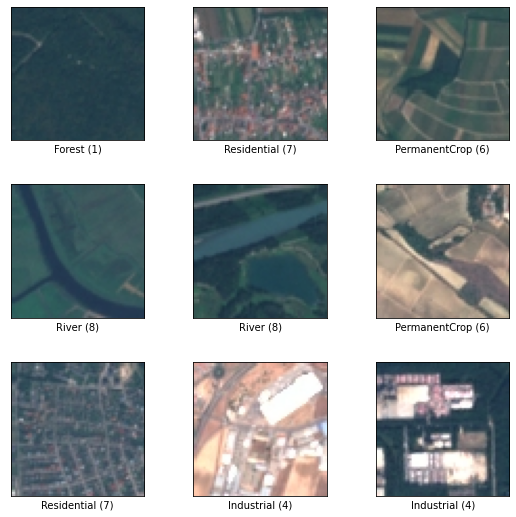

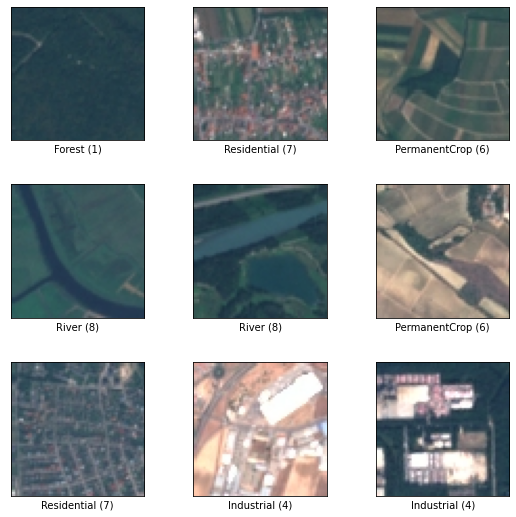

In [28]:
tfds.show_examples(train_ds, info)

,image,label
0,,9 (SeaLake)
1,,8 (River)
2,,9 (SeaLake)
3,,9 (SeaLake)
4,,9 (SeaLake)
5,,0 (AnnualCrop)
6,,2 (HerbaceousVegetation)
7,,0 (AnnualCrop)
8,,0 (AnnualCrop)
9,,2 (HerbaceousVegetation)

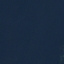
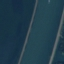
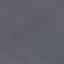
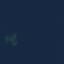
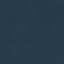
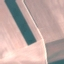
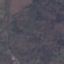
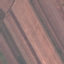
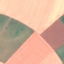
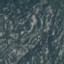

In [29]:
tfds.as_dataframe(valid_ds.take(10), info)

In [30]:
NUM_CLASSES = info.features["label"].num_classes
print(NUM_CLASSES)

10


In [31]:
print(info.features["label"].int2str(6))

PermanentCrop


In [32]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000

def preprocess_data(image, label):
    image = tf.cast(image, tf.float32) / 255.   
    return image, label

train_data = train_ds.map(preprocess_data, num_parallel_calls=tf.data.AUTOTUNE)
valid_data = valid_ds.map(preprocess_data, num_parallel_calls=tf.data.AUTOTUNE)

train_data = train_data.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
valid_data = valid_data.batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE) 

In [33]:
def build_model():

    model = tf.keras.Sequential([

        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'), 
        tf.keras.layers.Dropout(0.3),  
        tf.keras.layers.Dense(64, activation='relu'), 
        tf.keras.layers.Dropout(0.3),              
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax'),
    ])

    return model

model = build_model()

In [34]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, 
                    validation_data=valid_data, 
                    epochs=50)    

Epoch 1/50
338/338 [==============================] - 16s 43ms/step - loss: 1.6298 - accuracy: 0.4313 - val_loss: 1.5603 - val_accuracy: 0.4833
Epoch 2/50
338/338 [==============================] - 14s 40ms/step - loss: 1.2634 - accuracy: 0.5628 - val_loss: 0.8980 - val_accuracy: 0.7250
Epoch 3/50
338/338 [==============================] - 10s 29ms/step - loss: 1.1022 - accuracy: 0.6159 - val_loss: 0.8287 - val_accuracy: 0.7291
Epoch 4/50
338/338 [==============================] - 13s 36ms/step - loss: 0.9504 - accuracy: 0.6648 - val_loss: 0.6801 - val_accuracy: 0.7798
Epoch 5/50
338/338 [==============================] - 12s 34ms/step - loss: 0.8725 - accuracy: 0.6974 - val_loss: 0.6320 - val_accuracy: 0.7996
Epoch 6/50
338/338 [==============================] - 13s 36ms/step - loss: 0.7877 - accuracy: 0.7313 - val_loss: 0.6811 - val_accuracy: 0.7676
Epoch 7/50
338/338 [==============================] - 12s 35ms/step - loss: 0.7493 - accuracy: 0.7437 - val_loss: 0.5574 - val_accuracy:

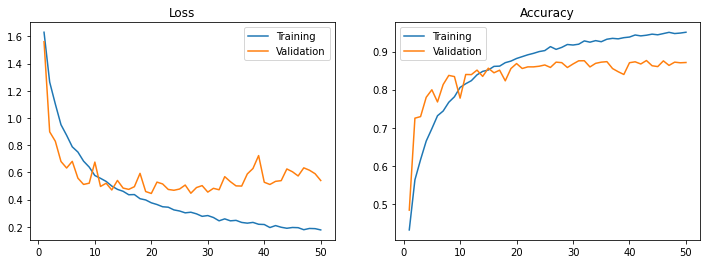

In [35]:
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 50)

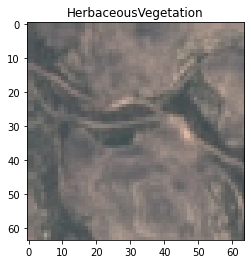

In [36]:
image_batch, label_batch = next(iter(train_data.take(1)))

image = image_batch[0]   
label = label_batch[0].numpy()  

plt.imshow(image)
plt.title(info.features["label"].int2str(label));

In [39]:
def plot_augmentation(original, augmented):

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].imshow(original)
    axes[0].set_title('Original')

    axes[1].imshow(augmented)
    axes[1].set_title('Augmented')

    plt.show()

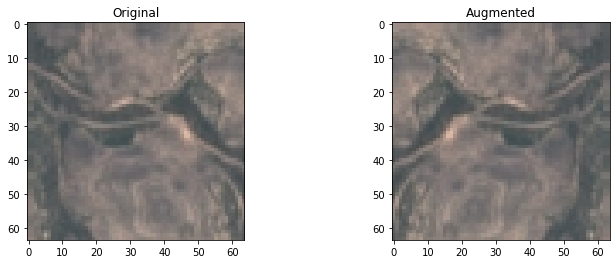

In [40]:
lr_flip = tf.image.flip_left_right(image)
plot_augmentation(image, lr_flip)

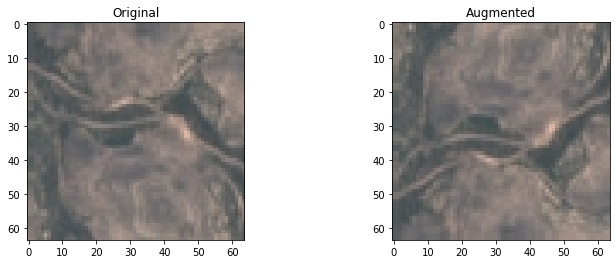

In [44]:
ud_flip = tf.image.flip_up_down(image)
plot_augmentation(image, ud_flip)

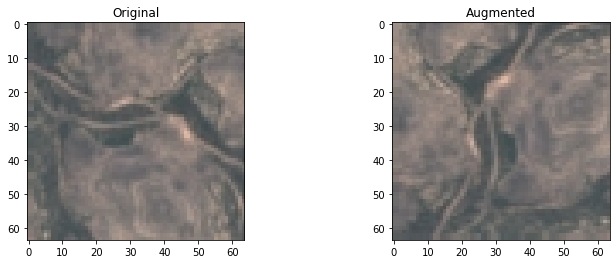

In [43]:
rotate90 = tf.image.rot90(image)
plot_augmentation(image, rotate90)

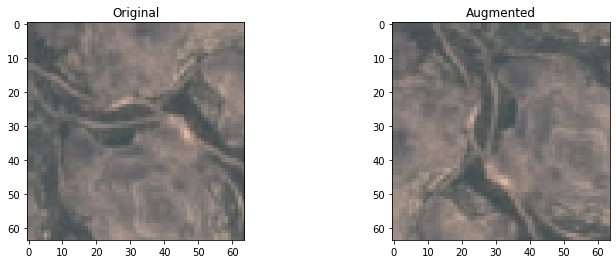

In [42]:
transpose = tf.image.transpose(image)
plot_augmentation(image, transpose)

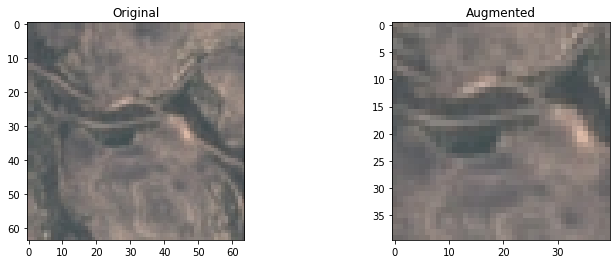

In [45]:
crop1 = tf.image.central_crop(image, central_fraction=0.6)
plot_augmentation(image, crop1)

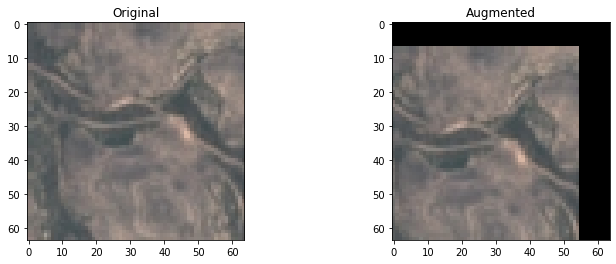

In [48]:
img = tf.image.resize_with_crop_or_pad(image, 64 + 20, 64 + 20) # 사이즈 키우기
crop2 = tf.image.random_crop(img, size=[64, 64, 3])
plot_augmentation(image, crop2)

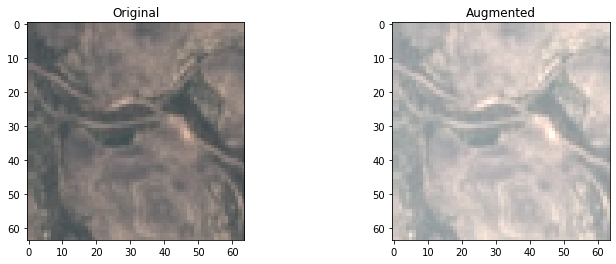

In [47]:
brightness = tf.image.adjust_brightness(image, delta=0.3)
plot_augmentation(image, brightness)

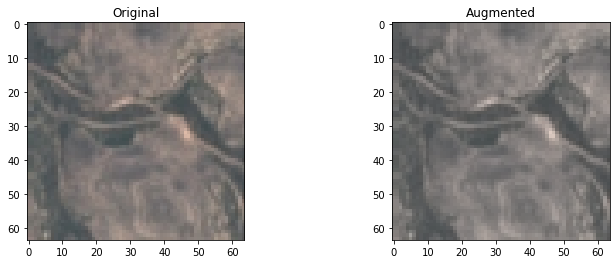

In [49]:
saturation = tf.image.adjust_saturation(image, saturation_factor=0.5)
plot_augmentation(image, saturation)

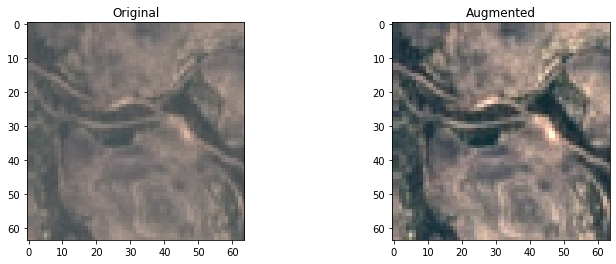

In [50]:
contrast = tf.image.adjust_contrast(image, contrast_factor=2)
plot_augmentation(image, contrast)

In [52]:
def data_augmentation(image, label):

    image = tf.image.random_flip_left_right(image) 
    image = tf.image.random_flip_up_down(image)    
    image = tf.image.random_brightness(image, max_delta=0.3) 
    image = tf.image.random_crop(image, size=[64, 64, 3])

    image = tf.cast(image, tf.float32) / 255.   

    return image, label

train_aug = train_ds.map(data_augmentation, num_parallel_calls=tf.data.AUTOTUNE)
valid_aug = valid_ds.map(data_augmentation, num_parallel_calls=tf.data.AUTOTUNE)

train_aug = train_aug.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
valid_aug = valid_aug.batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE) 

print(train_aug)
print(valid_aug)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [53]:
aug_model = build_model()

aug_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

aug_history = aug_model.fit(train_aug,
                            validation_data=valid_aug,
                            epochs=50)

Epoch 1/50
338/338 [==============================] - 24s 63ms/step - loss: 1.8892 - accuracy: 0.3103 - val_loss: 1.6817 - val_accuracy: 0.4472
Epoch 2/50
338/338 [==============================] - 12s 35ms/step - loss: 1.5613 - accuracy: 0.4147 - val_loss: 1.2859 - val_accuracy: 0.5339
Epoch 3/50
338/338 [==============================] - 12s 35ms/step - loss: 1.3987 - accuracy: 0.4811 - val_loss: 1.1219 - val_accuracy: 0.6031
Epoch 4/50
338/338 [==============================] - 14s 40ms/step - loss: 1.2842 - accuracy: 0.5319 - val_loss: 1.1582 - val_accuracy: 0.5978
Epoch 5/50
338/338 [==============================] - 17s 49ms/step - loss: 1.1864 - accuracy: 0.5731 - val_loss: 0.9091 - val_accuracy: 0.7020
Epoch 6/50
338/338 [==============================] - 17s 48ms/step - loss: 1.1213 - accuracy: 0.6023 - val_loss: 1.0677 - val_accuracy: 0.6409
Epoch 7/50
338/338 [==============================] - 17s 48ms/step - loss: 1.0632 - accuracy: 0.6254 - val_loss: 0.8455 - val_accuracy:

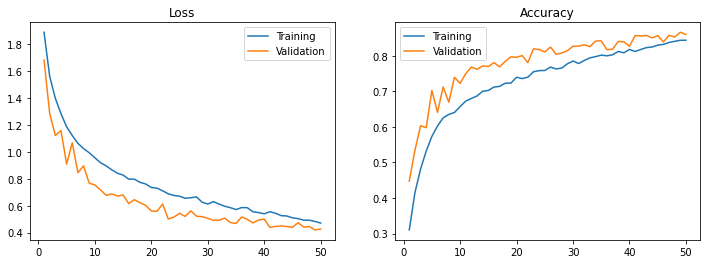

In [54]:
plot_loss_acc(aug_history, 50)

In [55]:
from tensorflow.keras.applications import ResNet50V2

pre_trained_base = ResNet50V2(include_top=False,
                              weights='imagenet',
                              input_shape=[64, 64, 3])

pre_trained_base.trainable = False

from tensorflow.keras.utils import plot_model
plot_model(pre_trained_base, show_shapes=True, show_layer_names=True, to_file='resnet50.png')

Output hidden; open in https://colab.research.google.com to view.

In [56]:
def build_trainsfer_classifier():

  model = tf.keras.Sequential([
      
    pre_trained_base,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax'),
  ])

  return model

tc_model = build_trainsfer_classifier()
tc_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2, 2, 2048)        23564800  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               1048704   
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 10)               

In [57]:
tc_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

tc_history = tc_model.fit(train_aug,
                          validation_data = valid_aug,
                          epochs=50)

Epoch 1/50
338/338 [==============================] - 28s 69ms/step - loss: 1.0459 - accuracy: 0.6658 - val_loss: 0.5949 - val_accuracy: 0.8102
Epoch 2/50
338/338 [==============================] - 22s 63ms/step - loss: 0.7306 - accuracy: 0.7715 - val_loss: 0.5211 - val_accuracy: 0.8294
Epoch 3/50
338/338 [==============================] - 22s 63ms/step - loss: 0.6454 - accuracy: 0.7943 - val_loss: 0.4983 - val_accuracy: 0.8339
Epoch 4/50
338/338 [==============================] - 21s 62ms/step - loss: 0.6017 - accuracy: 0.8061 - val_loss: 0.4736 - val_accuracy: 0.8496
Epoch 5/50
338/338 [==============================] - 22s 65ms/step - loss: 0.5755 - accuracy: 0.8157 - val_loss: 0.4623 - val_accuracy: 0.8496
Epoch 6/50
338/338 [==============================] - 24s 69ms/step - loss: 0.5505 - accuracy: 0.8250 - val_loss: 0.4671 - val_accuracy: 0.8483
Epoch 7/50
338/338 [==============================] - 23s 67ms/step - loss: 0.5243 - accuracy: 0.8325 - val_loss: 0.4457 - val_accuracy:

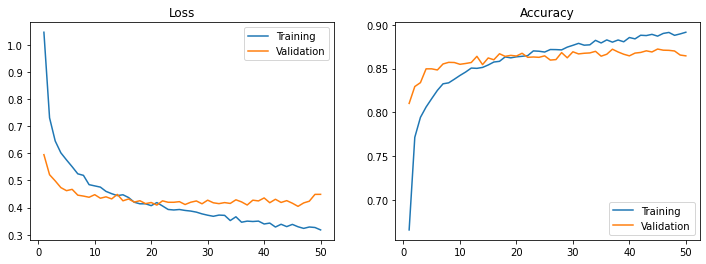

In [58]:
plot_loss_acc(tc_history, 50)